In [1]:
import pandas as pd
df=pd.read_csv(r'C:\Users\SNB\Desktop\nouveau..csv', sep=';')
print(df.head())
print(df[['PassengerId','Survived']].head())
print(df.info(verbose=None, buf=None, max_cols=None, memory_usage=None, null_counts=None))

df.info()
print(df.isnull().sum())
df.isnull().sum().sum()
df.drop('Cabin',axis=1, inplace=True)
df['Age'].fillna(df['Age'].median(),inplace=True)
print(df['Age'])
print(df['Age'].isnull().sum())

df.tail()
print(df['Embarked'].isnull().sum())
number_of_elements1 = len(df['Embarked'])
print('Number of elements Embarked :',number_of_elements1)
print(df['Embarked'].value_counts())
df['Embarked'].fillna('S',inplace=True)
df.tail()
print(df['Embarked'].isnull().sum())
print(df.isnull().sum())
df.isnull().sum().sum()


   PassengerId Survived  Pclass                                         Name  \
0          343       No       2                   Collander, Mr. Erik Gustaf   
1           76       No       3                      Moen, Mr. Sigurd Hansen   
2          641       No       3                       Jensen, Mr. Hans Peder   
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672       No       1                       Davidson, Mr. Thornton   

      Sex   Age  SibSp  Parch      Ticket     Fare  Cabin Embarked  
0    male  28.0      0      0      248740  13.0000    NaN        S  
1    male  25.0      0      0      348123   7.6500  F G73        S  
2    male  20.0      0      0      350050   7.8542    NaN        S  
3  female  29.0      0      4      349909  21.0750    NaN        S  
4    male  31.0      1      0  F.C. 12750  52.0000    B71        S  
   PassengerId Survived
0          343       No
1           76       No
2          641       No
3        

0

In [2]:
clean_sex = {'Sex':{'male':0,'female':1}}
df.replace(clean_sex,inplace=True)
clean_embarked = {'Embarked':{'S':0,'C':1,'Q':2}}
df.replace(clean_embarked,inplace=True)
clean_survived = {'Survived':{'Yes':1,'No':0}}
df.replace(clean_survived,inplace=True)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,0
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,0
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,0
5,105,0,3,"Gustafsson, Mr. Anders Vilhelm",0,37.0,2,0,3101276,7.9250,0
6,576,0,3,"Patchett, Mr. George",0,19.0,0,0,358585,14.5000,0
7,382,1,3,"Nakid, Miss. Maria (""Mary"")",1,1.0,0,2,2653,15.7417,1
8,228,0,3,"Lovell, Mr. John Hall (""Henry"")",0,20.5,0,0,A/5 21173,7.2500,0
9,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",1,42.0,1,0,SC/AH 3085,26.0000,0


In [3]:
df.drop('PassengerId',axis=1, inplace=True)
df.drop('Ticket',axis=1, inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,13.0000,0
1,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,7.6500,0
2,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,7.8542,0
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,21.0750,0
4,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,52.0000,0
...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,30.0708,1
887,0,3,"Sirayanian, Mr. Orsen",0,22.0,0,0,7.2292,1
888,0,3,"Cacic, Miss. Marija",1,30.0,0,0,8.6625,0
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,28.0,0,0,7.8958,0


# Logistic Regression

In [12]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x=df[["Pclass", "Sex", "Age", "SibSp","Parch","Fare","Embarked"]]
y=df["Survived"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 
logreg= LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.3f}".format(logreg.score(x_test, y_test)))

Accuracy=0.801


C:\Users\SNB\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


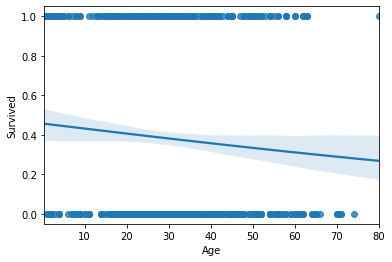

In [5]:
import seaborn as sns
sns.regplot(x='Age',y='Survived',data=df,logistic=True)

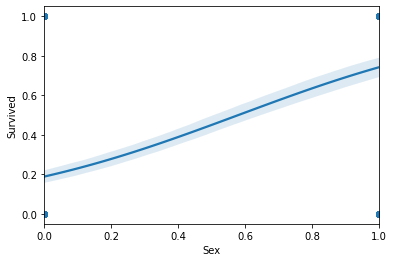

In [6]:
import seaborn as sns
sns.regplot(x='Sex',y='Survived',data=df,logistic=True)

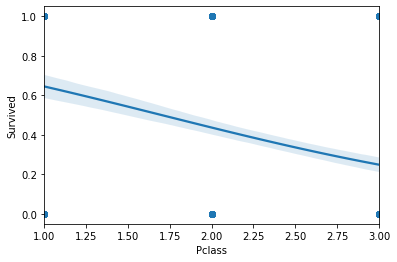

In [7]:
import seaborn as sns
sns.regplot(x='Pclass',y='Survived',data=df,logistic=True)

#  Confusion matrix

In [9]:
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
print(confusion_matrix)

Predicted    0   1
Actual            
0          160  29
1           33  90


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       189
           1       0.76      0.73      0.74       123

    accuracy                           0.80       312
   macro avg       0.79      0.79      0.79       312
weighted avg       0.80      0.80      0.80       312



# Roc_Auc

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred_prob1 = logreg.predict_proba(x_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

0.8628640254656514


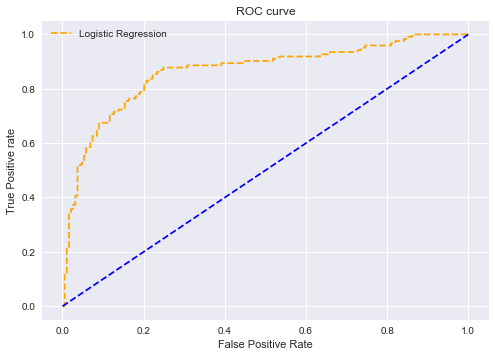

In [15]:

import matplotlib.pyplot as plt
plt.style.use('seaborn')


plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();